<a href="https://colab.research.google.com/github/amit-kumar9766/Deeplearning.ai/blob/master/Singapore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
import io
import pickle

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv to singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv
User uploaded file "singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv" with length 942898 bytes


In [0]:
import pandas as pd
df=pd.read_csv('singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv')

In [6]:
df.head()

,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266


In [0]:
#Largest ethnic group in Singapore

In [7]:
df.dtypes

year        int64
level_1    object
level_2    object
value      object
dtype: object

In [0]:
df['value'] = df['value'].apply(pd.to_numeric, errors='coerce')

In [0]:
A=df.groupby('level_1') ["value"].sum()


In [10]:
A# not adding just writing the nos after nos

level_1
Other Ethnic Groups (Females)      1886349.0
Other Ethnic Groups (Males)        1753101.0
Other Ethnic Groups (Total)        3639417.0
Total Chinese                    148157861.0
Total Female Chinese              75942931.0
Total Female Indians               6528837.0
Total Female Malays               12809553.0
Total Female Residents            97167570.0
Total Indians                     14563406.0
Total Malays                      25814830.0
Total Male Chinese                72214945.0
Total Male Indians                 8034588.0
Total Male Malays                 13005325.0
Total Male Residents              95007879.0
Total Residents                  192175418.0
Name: value, dtype: float64

In [11]:
A=A.sort_values(kind='mergesort')
print(A)

level_1
Other Ethnic Groups (Males)        1753101.0
Other Ethnic Groups (Females)      1886349.0
Other Ethnic Groups (Total)        3639417.0
Total Female Indians               6528837.0
Total Male Indians                 8034588.0
Total Female Malays               12809553.0
Total Male Malays                 13005325.0
Total Indians                     14563406.0
Total Malays                      25814830.0
Total Male Chinese                72214945.0
Total Female Chinese              75942931.0
Total Male Residents              95007879.0
Total Female Residents            97167570.0
Total Chinese                    148157861.0
Total Residents                  192175418.0
Name: value, dtype: float64


In [175]:
A.sum()


768702010.0

In [12]:
percent=(192175418.0/768702010.0)
percent

0.2499998900744386

In [0]:
#Total Residents is the largest ethnic group and they compromise about 25%

In [0]:
#Average of total residents over the years
A=df[df['level_1']=='Total Residents']


In [26]:
A.groupby('year')['value'].mean()

year
1957     68281.954545
1958     97031.250000
1959    101431.250000
1960    105243.750000
1961    108825.000000
1962    111975.000000
1963    114925.000000
1964    117956.250000
1965    120925.000000
1966    124112.500000
1967    127012.500000
1968    129356.250000
1969    131437.500000
1970    106686.200000
1971    136662.500000
1972    139456.250000
1973    142268.750000
1974    144906.250000
1975    147131.250000
1976    149381.250000
1977    151650.000000
1978    153718.750000
1979    155831.250000
1980    113671.136364
1981    139340.000000
1982    142119.111111
1983    144856.500000
1984    147412.111111
1985    150090.333333
1986    152580.833333
            ...      
1989    161413.000000
1990    140525.000000
1991    143756.045455
1992    146899.363636
1993    150034.227273
1994    153129.181818
1995    156207.136364
1996    159247.181818
1997    162435.545455
1998    165746.318182
1999    168782.590909
2000    171640.545455
2001    175037.863636
2002    178689.318182
2003 

In [172]:
B=df.groupby('level_2') ["value"].sum()
B

level_2
0  -  4 Years      56334880.0
10 - 14 Years      57838966.0
15 - 19 Years      56301016.0
20 - 24 Years      55078706.0
25 - 29 Years      56147405.0
30 - 34 Years      55688454.0
35 - 39 Years      52935226.0
40 - 44 Years      48600165.0
45 - 49 Years      43314851.0
5  -  9 Years      58076186.0
50 - 54 Years      37397546.0
55 - 59 Years      30750972.0
60 - 64 Years      23988284.0
65 - 69 Years      17672497.0
65 Years & Over    45746835.0
70 - 74 Years      10642861.0
70 Years & Over    28074338.0
75 - 79 Years       6313037.0
75 Years & Over    14530277.0
80 - 84 Years       3761021.0
80 Years & Over     6648274.0
85 Years & Over     2860213.0
Name: value, dtype: float64

In [100]:
B=B.sort_values(kind='mergesort')
print(B)

level_2
85 Years & Over     2860213.0
80 - 84 Years       3761021.0
75 - 79 Years       6313037.0
80 Years & Over     6648274.0
70 - 74 Years      10642861.0
75 Years & Over    14530277.0
65 - 69 Years      17672497.0
60 - 64 Years      23988284.0
70 Years & Over    28074338.0
55 - 59 Years      30750972.0
50 - 54 Years      37397546.0
45 - 49 Years      43314851.0
65 Years & Over    45746835.0
40 - 44 Years      48600165.0
35 - 39 Years      52935226.0
20 - 24 Years      55078706.0
30 - 34 Years      55688454.0
25 - 29 Years      56147405.0
15 - 19 Years      56301016.0
0  -  4 Years      56334880.0
10 - 14 Years      57838966.0
5  -  9 Years      58076186.0
Name: value, dtype: float64


In [0]:
#5-9 years has the maximum

In [179]:
percent=(58076186.0/768702010.0)
percent

0.07555097455774833

In [0]:
#5-9 compromises of the largest age group with about 7.5% of the total population

In [31]:
#Average population
A=df[df['level_2']=='5  -  9 Years']
A.groupby('year')['value'].mean()

year
1957    58159.200000
1958    61226.666667
1959    64266.666667
1960    66746.666667
1961    69040.000000
1962    71120.000000
1963    73600.000000
1964    75733.333333
1965    77626.666667
1966    79360.000000
1967    80080.000000
1968    79440.000000
1969    78693.333333
1970    73065.866667
1971    73786.666667
1972    71866.666667
1973    69333.333333
1974    65866.666667
1975    62480.000000
1976    60613.333333
1977    59866.666667
1978    60053.333333
1979    60106.666667
1980    57768.000000
1981    56444.000000
1982    55093.133333
1983    52659.800000
1984    51570.666667
1985    51210.733333
1986    51958.400000
            ...     
1989    53885.733333
1990    54834.133333
1991    54881.933333
1992    54593.133333
1993    56095.733333
1994    59686.400000
1995    61488.866667
1996    64605.333333
1997    67549.533333
1998    68650.600000
1999    68306.400000
2000    68419.733333
2001    67753.866667
2002    67517.866667
2003    65878.400000
2004    64137.866667
2005    

In [0]:
##but how to find average growth

In [0]:
##Identify the group (by age, ethnicity and gender) that:
a. Has shown the highest growth rate
b. Has shown the lowest growth rate
c. Has remained the same
4. Plot a graph for population trends

In [131]:
[Other Ethnic Groups (Males) , Other Ethnic Groups (Females), Other Ethnic Groups (Total) , Total Female Indians   ,  Total Male Indians  ,  Total Female Malays ,              
Total Male Malays , Total Indians     , Total Malays , Total Male Chinese ,Total Female Chinese ,  Total Male Residents , Total Female Residents  ,   Total Chinese ,                  
Total Residents ]

SyntaxError: ignored

In [0]:
C=df[df['level_1']=='Other Ethnic Groups (Total)']
D=df[df['level_1']=='Total Indians']
E=df[df['level_1']=='Total Malays']
F=df[df['level_1']=='Total Chinese']
G=df[df['level_1']=='Total Residents']

In [0]:
#Other Ethnic Groups (Males) , Other Ethnic Groups (Females),, Total Female Indians
H=df[df['level_1']=='Other Ethnic Groups (Males)']
I=df[df['level_1']=='Other Ethnic Groups (Females)']
J=df[df['level_1']=='Total Female Indians']
K=df[df['level_1']=='Total Male Indians']
L=df[df['level_1']=='Total Female Malays']
M=df[df['level_1']== 'Total Male Malays']
N=df[df['level_1']== 'Total Female Chinese']


<BarContainer object of 1364 artists>

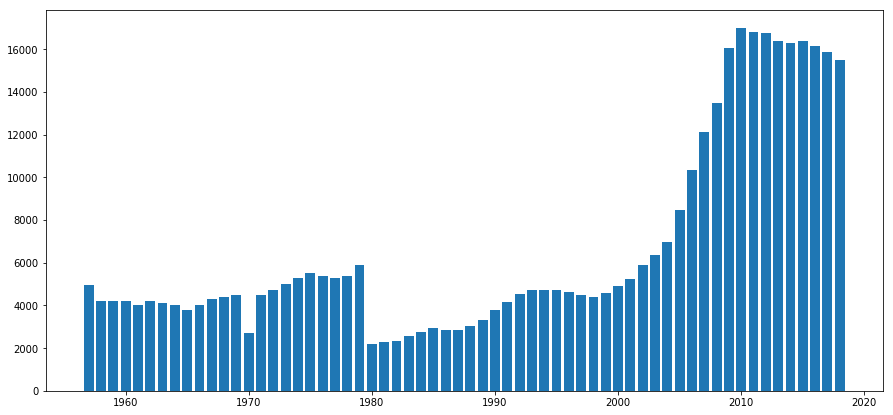

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=C['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

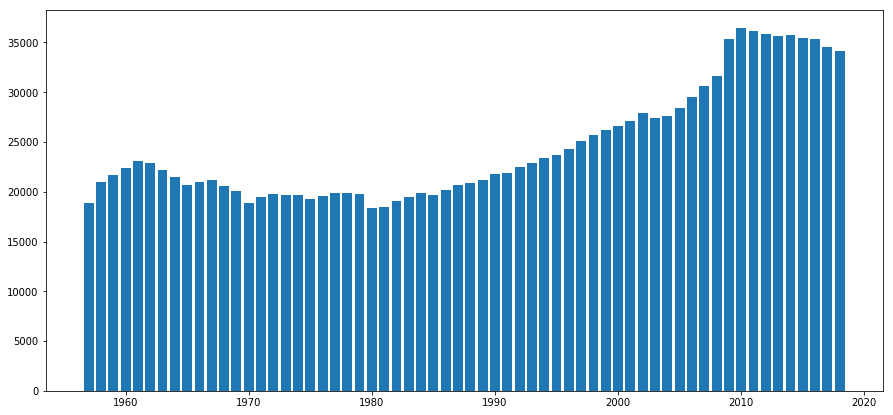

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=D['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

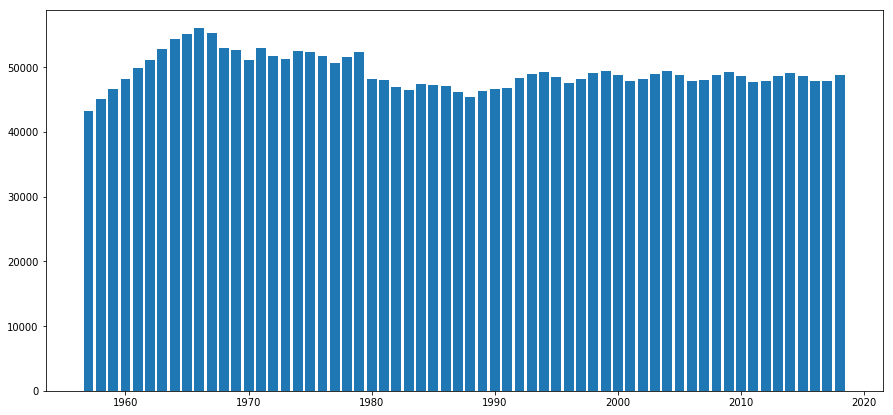

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=E['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

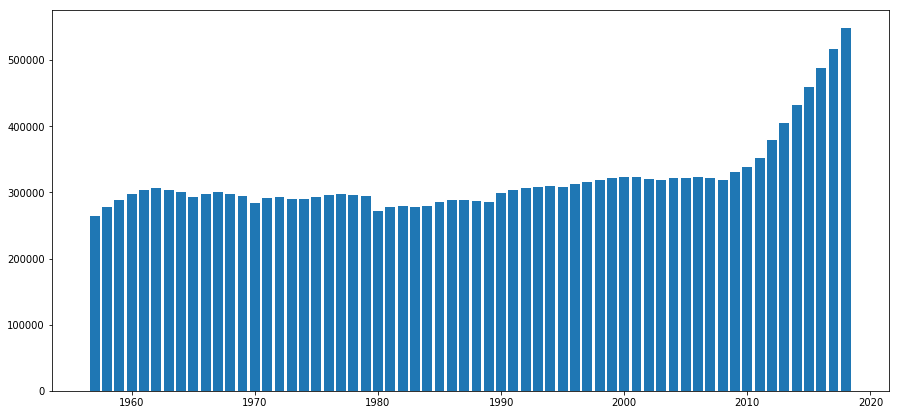

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=G['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

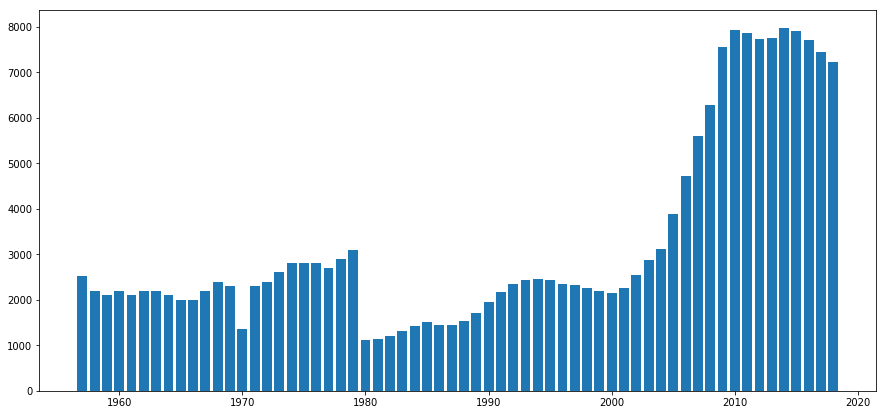

In [140]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=H['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

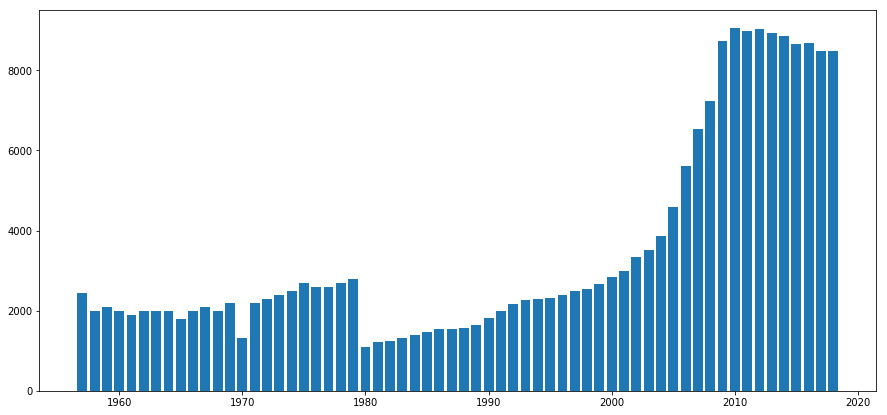

In [141]:

plt.figure(figsize=(15,7))
x=I['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

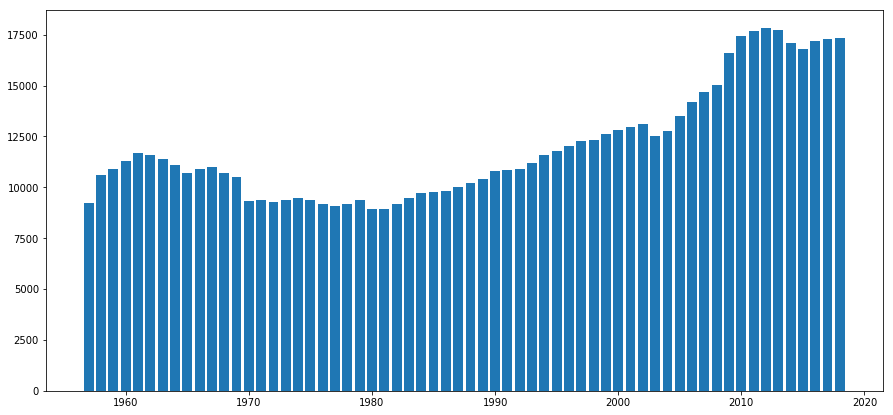

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=J['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

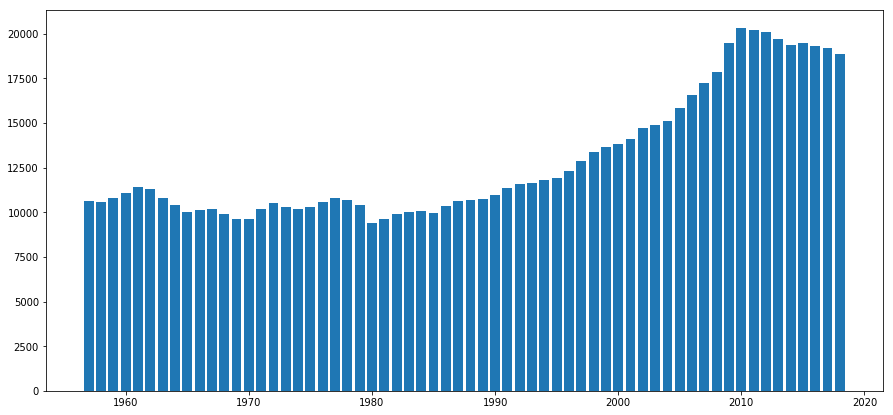

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=K['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

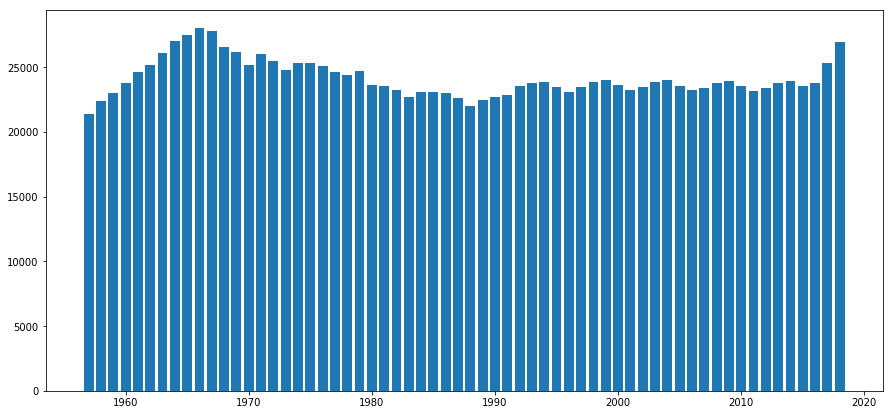

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=L['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

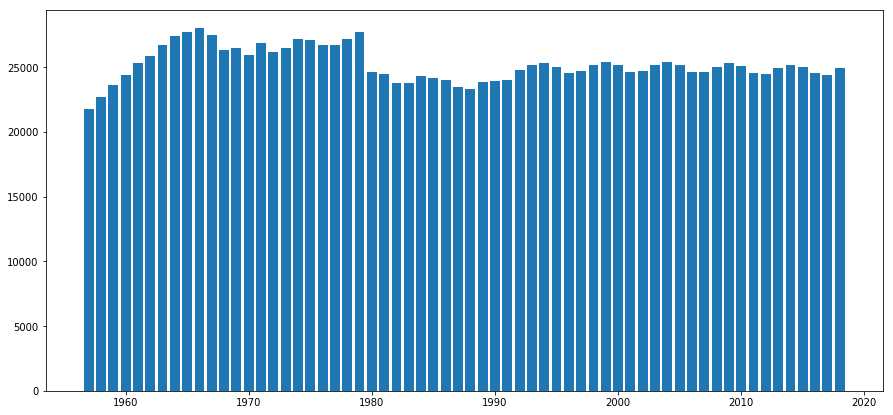

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=M['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

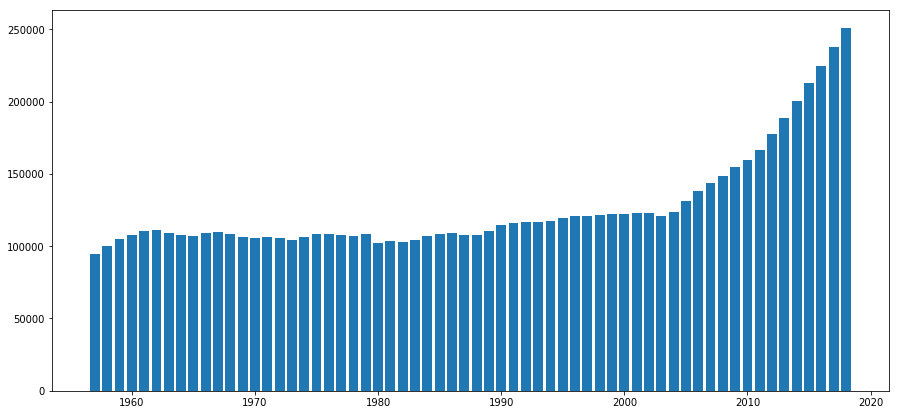

In [146]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=N['value']
y=C['year']
plt.bar(y,x)

In [0]:
New=df['level_2']

In [164]:
df.groupby('level_2')['value'].sum()

level_2
0  -  4 Years      56334880.0
10 - 14 Years      57838966.0
15 - 19 Years      56301016.0
20 - 24 Years      55078706.0
25 - 29 Years      56147405.0
30 - 34 Years      55688454.0
35 - 39 Years      52935226.0
40 - 44 Years      48600165.0
45 - 49 Years      43314851.0
5  -  9 Years      58076186.0
50 - 54 Years      37397546.0
55 - 59 Years      30750972.0
60 - 64 Years      23988284.0
65 - 69 Years      17672497.0
65 Years & Over    45746835.0
70 - 74 Years      10642861.0
70 Years & Over    28074338.0
75 - 79 Years       6313037.0
75 Years & Over    14530277.0
80 - 84 Years       3761021.0
80 Years & Over     6648274.0
85 Years & Over     2860213.0
Name: value, dtype: float64